**Приоритизация гипотез. Анализ А/В-теста.**
_____
**Описание исследования.**
    Необходимо приоритезировать гипотезы, подготовленные отделом маркетинка для увеличения выручки интернет-магазина. Запустить А/В-тесты для них и проанализировать результаты.
_____

**Исходные данные.**
    
     Описание данных
     *Данные для первой части*
     Файл /datasets/hypothesis.csv.
     Hypothesis — краткое описание гипотезы;
     Reach — охват пользователей по 10-балльной шкале;
     Impact — влияние на пользователей по 10-балльной шкале;
     Confidence — уверенность в гипотезе по 10-балльной шкале;
     Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
    *Данные для второй части*
    Файл /datasets/orders.csv. 
    transactionId — идентификатор заказа;
    visitorId — идентификатор пользователя, совершившего заказ;
    date — дата, когда был совершён заказ;
    revenue — выручка заказа;
    group — группа A/B-теста, в которую попал заказ.
    Файл /datasets/visitors.csv. Скачать датасет
    date — дата;
    group — группа A/B-теста;
    visitors — количество пользователей в указанную дату в указанной группе A/B-теста
______



***Часть 1. Приоритизация гипотез:***
* [1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#1-bullet)
* [2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.](#2-bullet)
* [2. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.](#3-bullet)


***Часть 2.   Анализ A/B-теста:***
* [1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.](#4-bullet)
* [2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.](#5-bullet)
* [3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.](#6-bullet)
* [4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.](#7-bullet)
* [5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.](#8-bullet)
* [6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.](#9-bullet)
* [7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.](#10-bullet)
* [8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения..](#11-bullet)
* [9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.](#12-bullet)
* [10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.](#13-bullet)
* [11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения..](#14-bullet)
* [12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.](#15-bullet)
* [13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.](#16-bullet)
* [14. Примите решение по результатам теста и объясните его.](#17-bullet)




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import datetime as dt

### ЧАСТЬ 1

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
data # выведем датафрейм 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
data.rename(columns=str.lower, inplace=True) # приведем названия столбцов в нижний регистр

<a id = '1-bullet'></a>
1. Использование фреймворка ICE для приоритизации гипотез.

In [5]:
data['ICE'] = (data['impact']*data['confidence'])/data['efforts']

data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


<a id = '2-bullet'></a>
2. Использование фреймворка RICE для приоритизации гипотез.

In [6]:
data['RICE'] = (data['reach']*data['impact']*data['confidence'])/data['efforts']

data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


<a id = '3-bullet'></a>
3. Вывод.

При использовании метода ICE c наибольшим приоритетом получились гипотезы 9, 1 и 8. При использовании способа RICE наибольший приоритет получили гипотезы 8, 3 и 1. У 8 и 3 гипотезы значения параметра Reach (скольких пользователей затронет изменение, которое хотят внести), выше, чем у других гипотез, у 9 гипотезы же самый маленький размер этого параметра. Поэтому при добавлении этого параметра список приоритетных гипотез поменялся.

### Часть 2


In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
#преобразуем столбец с датами к соответсвующему формату
orders['date'] = pd.to_datetime(orders['date'])

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
943,1215018444,2406897935,2019-08-08,18350,B
859,549358396,3792964032,2019-08-10,2970,A
1028,4067377068,318152663,2019-08-10,1190,B
670,1096121493,1722729964,2019-08-29,620,B
439,1371922580,2452603128,2019-08-28,170,B
33,486237576,2378935119,2019-08-15,1650,A
1054,1266977500,931669455,2019-08-11,3390,B
1015,4262851755,1294878855,2019-08-31,570,A
864,1273552286,3993040832,2019-08-30,12642,B
370,857639553,2044997962,2019-08-24,2540,A


In [11]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors['date'] = pd.to_datetime(visitors['date'])
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
visitors.sample(10)

,date,group,visitors
7,2019-08-08,A,610
16,2019-08-17,A,412
25,2019-08-26,A,722
9,2019-08-10,A,406
36,2019-08-06,B,655
21,2019-08-22,A,609
58,2019-08-28,B,654
6,2019-08-07,A,644
52,2019-08-22,B,650
3,2019-08-04,A,717


In [14]:
orders.duplicated().sum()

0

In [15]:
visitors.duplicated().sum()

0

Провели проверку на наличие явных дубликатов в датафреймах. Таковых не обнаружено

<a id = '4-bullet'></a>
1. Графики кумулятивной выручки по группам.

In [16]:
# найдем количество пользователей которые могли попасть в обе группы
orders.groupby('visitorId').agg({'group':'nunique'}).query('group>1').count()

group    58
dtype: int64

In [17]:
# доля этих пользователей от общего количества
orders.groupby('visitorId').agg({'group':'nunique'}).query('group>1').count()*100/orders['visitorId'].count()

group    4.845447
dtype: float64

In [18]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}
    ), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


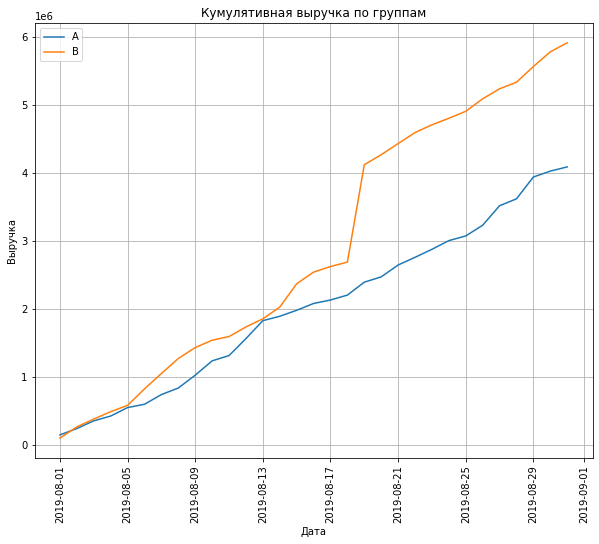

In [19]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
 
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам')
plt.legend() 

В группе А график выручки увеличивается практически равномерно во время всего теста. В группе В 19.08.2019 имеется резкий скачок выручки, т.е. в этот день был всплеск количества заказов либо были дорогие заказы. При этом на протяжении всего времени наблюдений выручка у группы В выше, чем у группы А.

<a id = '5-bullet'></a>
2. Графики кумулятивной среднего чека по группам.

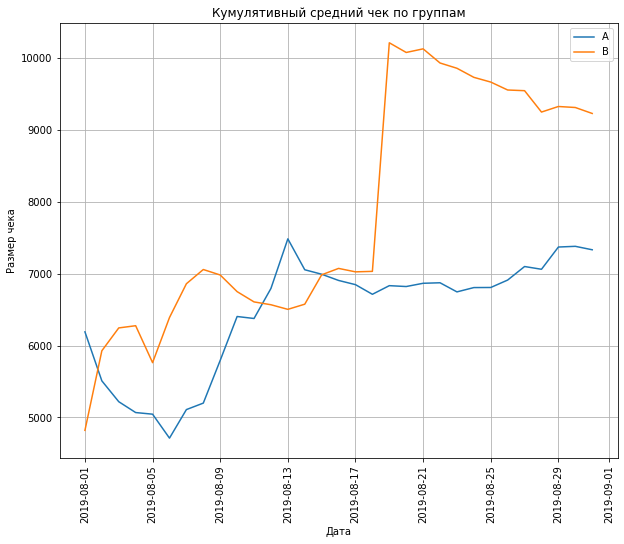

In [20]:
plt.figure(figsize=(10,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Размер чека')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек по группам')

plt.legend() 

Графики среднего чека в двух группах имеют несколько выбросов и равномерным становится лишь после 20 августа. Так же в группе В 19.08.2019 имеется достаточно резкий скачок, т.е можно предположить, что в эту дату случился какой-то аномально дорогой заказ.

<a id = '6-bullet'></a>
3. График относительного изменения кумулятивного среднего чека.

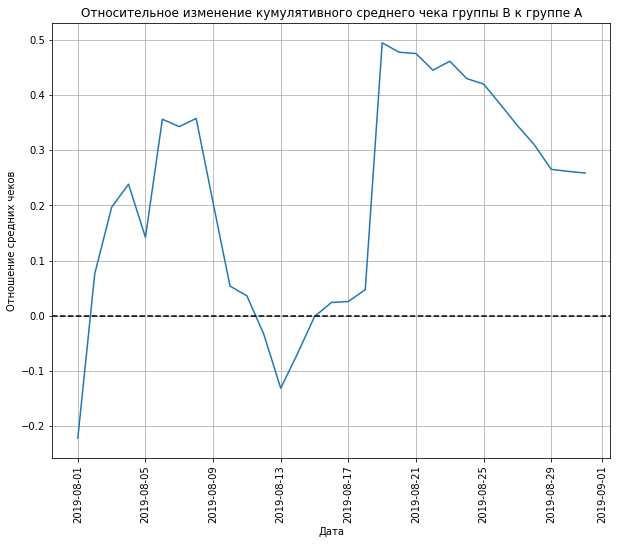

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(10,8))
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Отношение средних чеков')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')


plt.axhline(y=0, color='black', linestyle='--') 

В некоторых местах график имеет резкие скачки, самый резкий снова 19.08.2019

<a id = '7-bullet'></a>
4. График кумулятивного среднего количества заказов на посетителя.

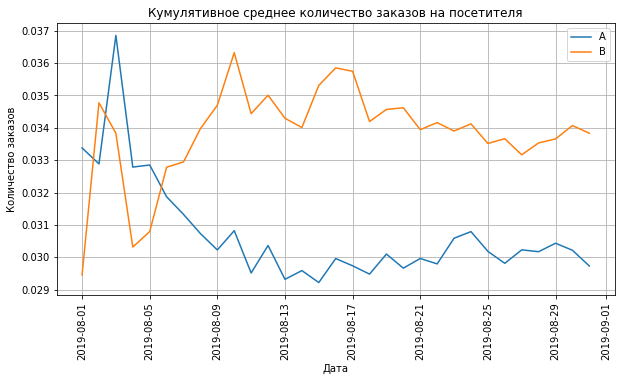

In [22]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10,5))

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.title('Кумулятивное среднее количество заказов на посетителя')
plt.legend()



В начале среднее количество заказов по группам колебалось сильнее, после 10 августа количество практически зафиксировалось на одном значении, при этом у группы В это значение выше, чем у группы А.

<a id = '8-bullet'></a>
5. График относительного изменения кумулятивного среднего количества заказов на посетителя.

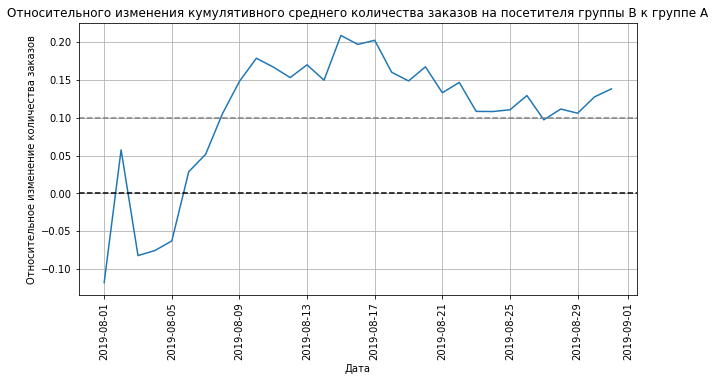

In [23]:
# построим график для относительного изменения среднего количества заказов
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions[
    'conversionA']-1)

plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Относительное изменение количества заказов')
plt.xlabel('Дата')
plt.title('Относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А')


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

Вначале относительное изменение количества заказов на посетителя колебалось, после 10 августа у группы В  в среднем на 10% выше среднее количество заказов на посетителя чем у группы А.

<a id = '9-bullet'></a>
6. Точечный график среднего количества заказов по пользователям.

In [24]:
#подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0.5, 1.0, 'Количество заказов по пользователям')

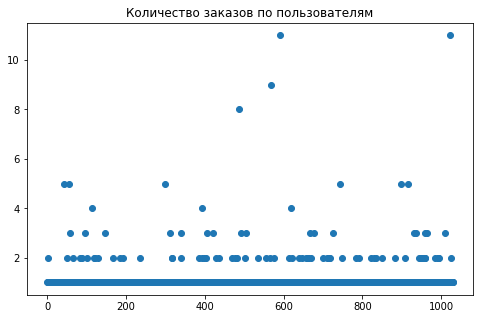

In [25]:
#построим точечный график
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(8,5))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')

Основная масса пользователей имеют 1-3 заказов, пользователи с выше 10 заказами, единичны и скорее всего будут аномальными.

<a id = '10-bullet'></a>
7. Процентили количества заказов по пользователям.

In [26]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Таким образом получается, что не более 5% пользователей имееют более 2х заказов и не более 1% более 4х. Выберем границу для определения аномальных пользователей равную 3м заказам.

<a id = '11-bullet'></a>
8. Точечный график стоимостей заказов.

Text(0.5, 1.0, 'Стоимости заказов')

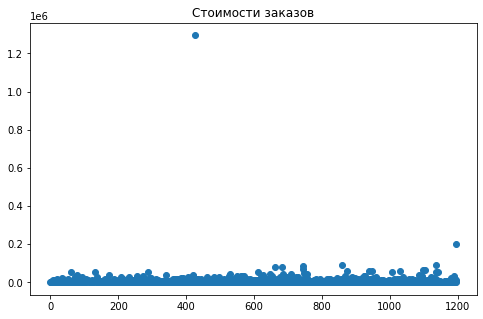

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(8,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимости заказов')

Text(0.5, 1.0, 'Стоимости заказов')

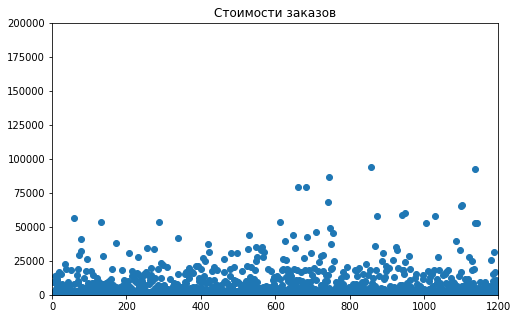

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(8,5))
plt.scatter(x_values, orders['revenue'])
plt.axis([0,1200,0,200000])
plt.title('Стоимости заказов')

In [29]:
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Есть два аномально дорогих заказа один более 1млн и второй более 200 тыс, ,большая часть заказов находится в пределах 25-30тыс. Аномальные заказы следует удалить из теста.

<a id = '12-bullet'></a>
9. Процентили стоимости заказов.

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5 % пользователей имеют заказы дороже 28тыс, и не более 1% имеют заказы дороже 59тыс. Примем за границу для аномальных значений стоимость заказа выше 30 тыс.

<a id = '13-bullet'></a>
10. Статистическая значимость различий в среднем количестве заказов на посетителя по "сырым" данным.


Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.


In [31]:
#посчитаем количество пользователей в выбранную дату в группе A 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#посчитаем количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#посчитаем количество пользователей в выбранную дату в группе B 
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [32]:
#посчитаем количество пользователей в выбранную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
# посчитаем количество пользователей до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#посчитаем количество пользователей в выбранную дату в группе В
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# посчитаем количество пользователей до выбранной даты включительно в группе В
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# объединим полученные данные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# посчитаем количество заказов по пользователям для двух групп
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост количества заказов по посетителям группы B по отношению к группе А', "{0:.3f}".format(
    sampleB.mean() / sampleA.mean() - 1))

p-value 0.017
Относительный прирост количества заказов по посетителям группы B по отношению к группе А 0.138


Первое число — p-value = 0.017 меньше 0.05. Значит, по неочищенным данным разница между средним числом заказов в группах статистически значима. Относительный прирост количества заказов по посетителям группы B по отношению к группе А равен 13.8% — второе число в выводе.

<a id = '14-bullet'></a>
11. Статистическая значимость различий в среднем чеке заказа по "сырым" данным.


Проверим статистическую значимость различий в среднем чеке между группами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 


In [33]:
print('p-value','{0:.3f}'.format(st.mannwhitneyu(orders[
    orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке между группами','{0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value 0.729
Относительное различие в среднем чеке между группами 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом, средний чек группы B значительно выше среднего чека группы A.

<a id = '15-bullet'></a>
12. Статистическая значимость различий в среднем количестве заказов на посетителя по "очищенным" данным.


Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей, что соответствует 95 процентилю количества заказов и стоимости соответственно 


In [34]:
order_pr = np.percentile(ordersByUsers['orders'], 95)
order_pr

2.0

In [35]:
revenue_pr = round(np.percentile(orders['revenue'], 95))
revenue_pr

28000

In [36]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_pr]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_pr]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_pr]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74



Проверим теже гипотезы на очищенных данных. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.


In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [38]:
print('p-value', '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительная разница между средним чеком группы В по отношению к А', '{0:.3f}'.format(
    sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value 0.013
относительная разница между средним чеком группы В по отношению к А 0.173


После удаления аномальных данных результаты по количеству заказов практически не изменились

<a id = '16-bullet'></a>
13. Статистическая значимость различий в среднем чека заказа по "очищенным" данным.


Проверим статистическую значимость различий в среднем чеке между группами после удаления аномалий. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 


In [39]:
print('p-value', '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница между чеками в группах', "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value 0.738
Относительная разница между чеками в группах -0.020


После очистки данных P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. В этом смысле результат не изменился, но относительная разница между средними чеками в двух группах снизилась значительно и составляет -2%.

<a id = '17-bullet'></a>
14. Выводы по результатам теста.

По проведенному тесту можно сделать следующие выводы.
Различия по среднему количеству заказов между группами и по «сырым», и по данным после удаления аномалий являются статистически значимыми. При этом относительный прирост количества заказов по группе В на 13,8 % выше в первом случае и на 17,3% во втором.
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после удаления аномалий, при этом после очистки данных разница между средними чеками в группах сократилась до 2%. Таким образом, можно остановить тест и зафиксировать победу группы В.


Конверсия группы В (количество заказов на пользователя) значительно выше конверсии группы А и до очистки данных и после, а также имеется тенденция к росту, соответсвенно можно утверждать, что изменения положительно повлияли на выручку магазина - посещения стали чаще конвертироваться в заказы